In [1]:
import nilearn.plotting
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
VI_striatum = '../templates/Striatum_network_1.nii.gz'
SM_striatum = '../templates/Striatum_network_2.nii.gz'
DA_striatum = '../templates/Striatum_network_3.nii.gz'
VA_striatum = '../templates/Striatum_network_4.nii.gz'
FP_striatum = '../templates/Striatum_network_6.nii.gz'
DM_striatum = '../templates/Striatum_network_7.nii.gz'
choi_full = '/projects/edickie/analysis/STOPPD_RST/201611_striatum/Choi2012_binary_2x2x2.nii.gz'


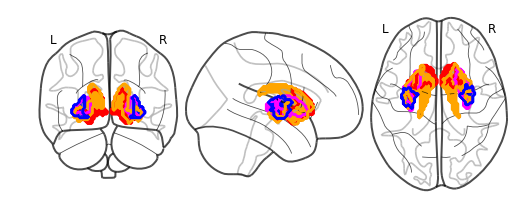

In [3]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(DM_striatum, filled = True, colors = 'red')
display.add_contours(VA_striatum, filled = True, colors = 'magenta')
display.add_contours(FP_striatum, filled = True, colors = 'orange')
display.add_contours(SM_striatum, filled = True, colors = 'blue')

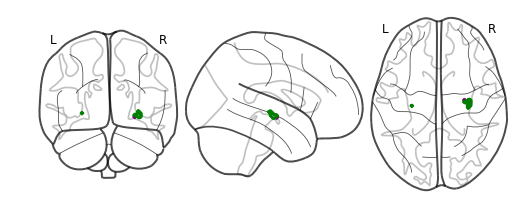

In [8]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(VI_striatum, filled = True, colors = 'purple')
display.add_contours(DA_striatum, filled = True, colors = 'green')

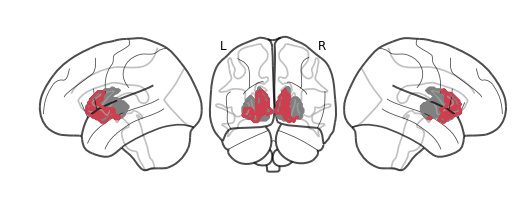

In [9]:
display = nilearn.plotting.plot_glass_brain(None, display_mode='lyr')
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(DM_striatum, filled = True, colors = '#cd3e4e')


In [10]:
display.savefig('DM_striatum_pic.png')

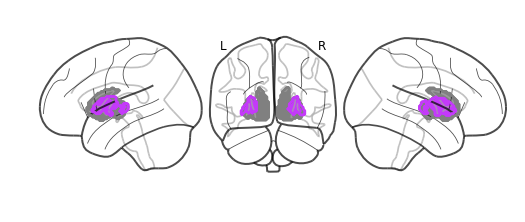

In [11]:
display = nilearn.plotting.plot_glass_brain(None, display_mode='lyr')
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(VA_striatum, filled = True, colors = '#c43afa')

In [12]:
display.savefig(filename='VA_Striatum_pic.png')

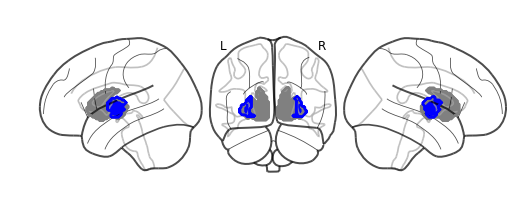

In [13]:
display = nilearn.plotting.plot_glass_brain(None, display_mode='lyr')
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(SM_striatum, filled = True, colors = 'blue')

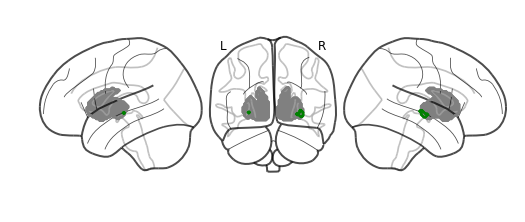

In [14]:
display = nilearn.plotting.plot_glass_brain(None, display_mode='lyr')
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(DA_striatum, filled = True, colors = 'green')

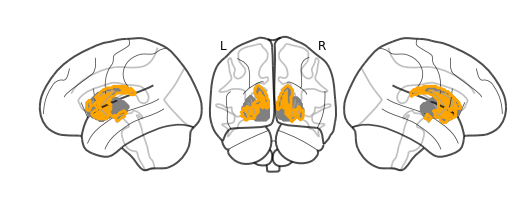

In [15]:
display = nilearn.plotting.plot_glass_brain(None, display_mode='lyr')
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(FP_striatum, filled = True, colors = 'orange')

In [16]:
from ciftify.utils import run


In [17]:
import logging

logger=logging.getLogger()

In [18]:
import ciftify.config
PINT_ROIs = '/projects/edickie/code/ciftify/ciftify/data/PINT/Yeo7_2011_80verts.csv'
PINT_clut = '/projects/edickie/code/ciftify/ciftify/data/PINT/Yeo7_2011_80verts_roiidx_LUT.txt'

In [19]:
run(['ciftify_surface_rois',
     '--vertex-col', 'tvertex',
     '--labels-col', 'NETWORK',
     PINT_ROIs, '6',
     '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii',
    '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii',
     'tvertex_6mm_mid.dscalar.nii'])

0

In [21]:
run(['ciftify_surface_rois', '--debug',
     '--vertex-col', 'tvertex',
     '--labels-col', 'NETWORK',
     PINT_ROIs, '8',
     '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii',
    '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii',
     'tvertex_6mm_mid.dscalar.nii'])

0

In [61]:
run(['ciftify_surface_rois', '--debug',
     '--vertex-col', 'tvertex',
     PINT_ROIs, '2',
     '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii',
    '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii',
     'tvertex_2mm_mid.dscalar.nii'])

0

In [16]:
!mkdir ../vertex_probmaps

In [24]:
probmap_outputs = '/projects/edickie/'
surfL = '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii'
surfR = '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii'
pint_concat = '../data/PINT_outputs_s8_6-6-12/SZ_pint_concat_20171218.csv'
subjects_list = '../phenotypic/subjects_not_sexmatched_20180507.csv'

In [22]:
import pandas

In [26]:
subjects = pandas.read_csv(subjects_list)
pint_concat = pandas.read_csv(pint_concat)

In [29]:
merged_data = pandas.merge(subjects, pint_concat, on = "subid")

In [56]:
all_SA_verts = merged_data.loc[merged_data.NETWORK == 4,:]

In [45]:
tempdir = ciftify.utils.TempDir()

In [46]:
import tempfile
tempdir = tempfile.mkdtemp()

In [57]:
import os.path
SA_verts_list = os.path.join(tempdir, "SAv.csv")
all_SA_verts.to_csv(SA_verts_list)

In [50]:
all_SA_verts

,subid,name,Site,DX,age,Sex,Edu,mean_fd,X.bad_fd,global_corr,mean_snfr,hemi,NETWORK,roiidx,tvertex,ivertex,dist_49,vertex_48,std_distance
0,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,L,3,1,6111,6318,0.000000,6318,7.798403
1,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,R,3,2,6141,6368,0.000000,6368,10.011822
2,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,L,3,3,19598,19703,0.000000,19703,11.845800
3,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,R,3,4,19537,19592,0.000000,19592,14.015079
4,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,L,3,5,13828,13579,0.000000,13579,7.961506
5,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,R,3,6,13828,13878,0.000000,13878,4.258821
6,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,L,3,7,14785,14839,0.000000,14839,2.614775
7,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,R,3,8,12052,14937,0.000000,14937,12.159645
8,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,L,3,9,7417,17239,0.000000,17239,8.973673
9,EXP_21359_SESS01,21359_4d_0009_0001,ZHH,Ctrl,23,M,15.000000,0.190568,0.389262,0.657545,54.310356,R,3,10,7507,7291,0.000000,7291,4.801762


In [58]:
run(['ciftify_surface_rois', 
     '--vertex-col', 'ivertex',
     '--probmap', 
     SA_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/SAprobmap_allsubs.dscalar.nii'])

0

In [62]:
run(['ciftify_surface_rois', 
     '--vertex-col', 'tvertex',
     '--probmap', 
     SA_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/SAtvertex_allsubs.dscalar.nii'])

0

In [55]:
all_DM_verts = merged_data.loc[merged_data.NETWORK == 7,:]
DM_verts_list = os.path.join(tempdir, "DMv.csv")
all_DM_verts.to_csv(DM_verts_list)
run(['ciftify_surface_rois', 
     '--vertex-col', 'ivertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/DMprobmap_allsubs.dscalar.nii'])

0

In [77]:
run(['ciftify_surface_rois', 
     '--vertex-col', 'tvertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/DMtvertex_allsubs.dscalar.nii'])

0

In [ ]:
run(['ciftify_surface_rois', 
     '--vertex-col', 'ivertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/DMprobmap_allsubs.dscalar.nii'])

In [73]:
run(['wb_command', '-cifti-separate','../vertex_probmaps/DMprobmap_allsubs.dscalar.nii', 'COLUMN',
    '-metric', 'CORTEX_LEFT', os.path.join(tempdir, 'DM.L.shape.gii'),
    '-metric', 'CORTEX_RIGHT', os.path.join(tempdir, 'DM.R.shape.gii'),])
run(['wb_command', '-metric-to-volume-mapping', os.path.join(tempdir, 'DM.L.shape.gii'),
    surfL, '/opt/quarantine/FSL/5.0.10/build/data/standard/MNI152_T1_2mm.nii.gz',
    '../vertex_probmaps/L_SM_probssurf.nii.gz', '-nearest-vertex', '1'])

0

ValueError: zero-size array to reduction operation minimum which has no identity

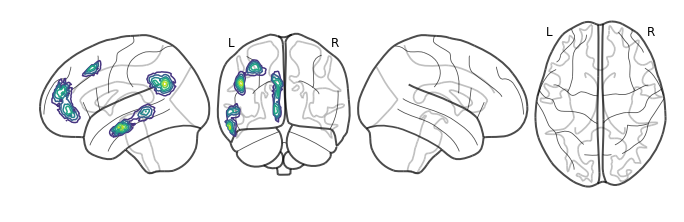

In [76]:
display = nilearn.plotting.plot_glass_brain(None, display_mode='lyrz')
display.add_contours('../vertex_probmaps/L_SM_probssurf.nii.gz',threshold=0.1)